In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv ("../../../../DATA/IPL Matches 2008-2020.csv")

In [ ]:
df.info()

In [ ]:
df['date'] = pd.to_datetime(df.date)

In [ ]:
def get_season (x):
    n = (x.year - 2008 + 1)
    return (f'Season {n}')

In [ ]:
df['Season'] = df.date.apply(get_season)

In [ ]:
df['year'] = df.date.dt.year

In [ ]:
def get_loser (x):
   if df.loc[x].team1 == df.loc[x].winner:
       return df.loc[x].team2
   else:
        return df.loc[x].team1


In [ ]:
loser = pd.Series(df.index).apply(get_loser)
df['loser'] = loser

In [ ]:
def get_teamName(x):
    sn= ''
    for name in x.split (' '):
        if (len (name) == 2):
            sn += name
        else:
            sn += name[0]
    return sn

In [ ]:
df.winner[1]

In [ ]:
df['team1'] = df.team1.apply (get_teamName)
df['team2'] = df.team2.apply (get_teamName)
df['winner'] = df.winner.apply (lambda x : get_teamName(str(x)))
df['loser'] = df.loser.apply (get_teamName)

In [ ]:
iplseason = df.groupby (by='year')

In [ ]:
season_12 = iplseason.get_group (2019)

In [ ]:
season_12.info()

In [ ]:
season_12.reset_index(drop=True, inplace=True)

In [ ]:
grp_city = df.groupby (by='city')

In [85]:
df.team1.value_counts()

RCB     108
MI       97
KKR      95
CSK      94
KXIP     92
DD       83
RR       70
SH       59
DC       58
PW       23
GL       16
RPS      14
KTK       7
Name: team1, dtype: int64

In [59]:
df.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Centurion          12
Sharjah            12
Ahmedabad          12
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [87]:
city_ch = grp_city.get_group ('Hyderabad')
city_ch.reset_index(drop=True, inplace=True)
rcb_played = city_ch.loc[((city_ch['team1'] == 'SH') | (city_ch['team2'] == 'SH'))]

In [88]:
toss_decision = list(rcb_played.loc[rcb_played.team1 == rcb_played.winner].toss_decision.value_counts().index)
toss_num= list(rcb_played.loc[rcb_played.team1 == rcb_played.winner].toss_decision.value_counts().values)

([<matplotlib.patches.Wedge at 0x1d1b95b8160>,
 [Text(-0.9225376172610243, 0.5991029500330908, 'field'),
  Text(1.0064046733756629, -0.6535668545815537, 'bat')],
 [Text(-0.5032023366878314, 0.32678342729077675, '56.67%'),
  Text(0.58706939280247, -0.38124733183923964, '43.33%')])

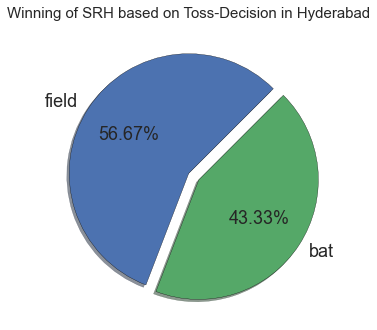

In [89]:
plt.style.use('seaborn')
explode = [0, 0.1]
plt.title ('Winning of SRH based on Toss-Decision in Hyderabad', fontsize=15)
plt.rcParams.update({'font.size': 18})
plt.pie (toss_num, labels= toss_decision, explode = explode,shadow=True, startangle = 45, autopct='%1.2f%%', wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 18})